In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing Dataset**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/OASIS/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Checking Null Values Presents**

In [ ]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#TO CHECK IF THE DATA HAS DUPLICATE OR NOT
data.duplicated().sum()

0

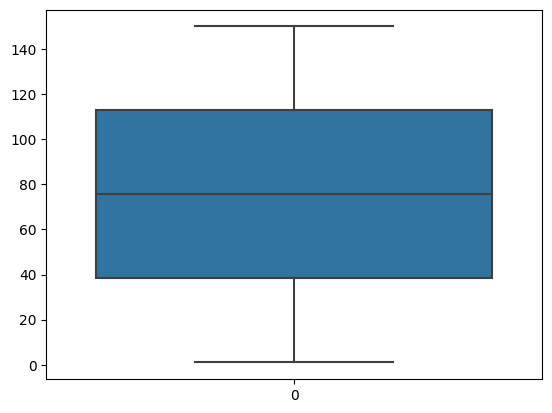

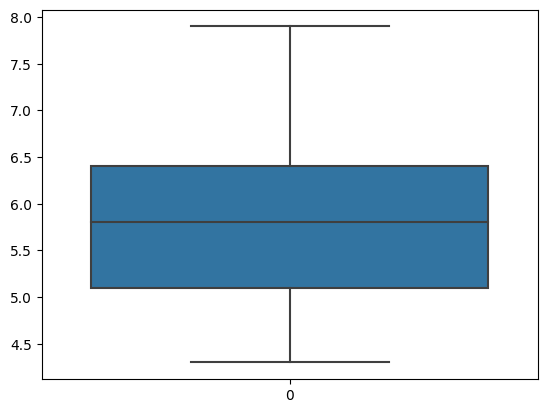

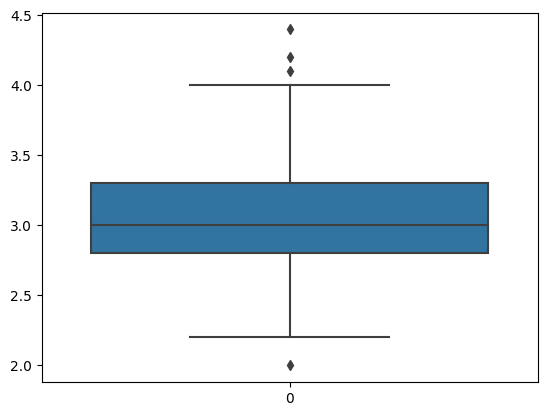

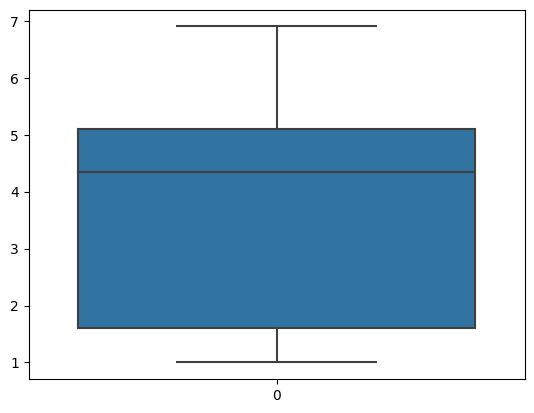

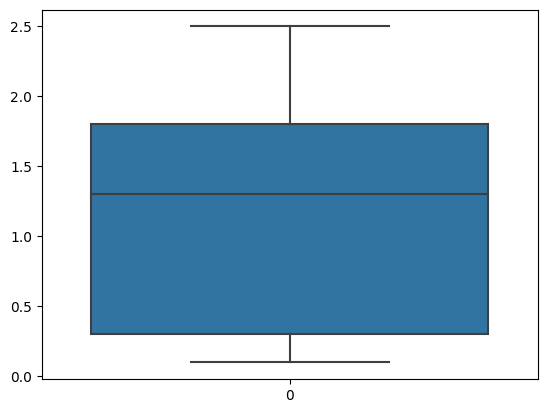

OUTLIERS OF THE DATA


In [ ]:
#TO IDENTIFY A OUTLIERS DRAW A BOXPLOT
try:
  for i in data:
    sns.boxplot(data[i])
    plt.show()
except:
  Exception
  print("OUTLIERS OF THE DATA")

**Splitting X and Y**

In [ ]:
x=data.iloc[:,:-1]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
y=data.iloc[:,-1:]
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


**Splitting Train and Test data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2
                                               )

In [ ]:
x_train.shape,x_test.shape

((120, 5), (30, 5))

**Model Building**

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="poly")

In [ ]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

**Prediction**

In [ ]:
prediction=classifier.predict(x_test)

**Accuracy of the Model**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction,y_test)

1.0

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(prediction,y_test)
print(cm)

[[12  0  0]
 [ 0  6  0]
 [ 0  0 12]]


**HeatMap**

<Axes: >

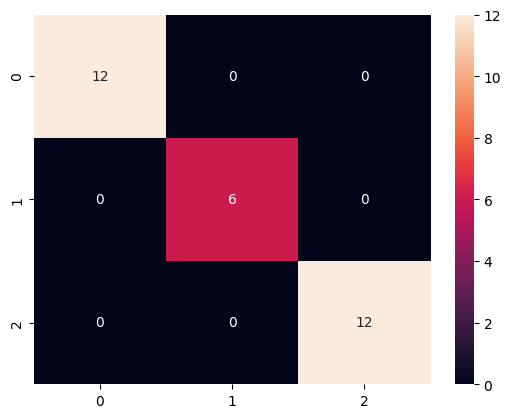

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True)

**New Prediction**

In [ ]:
new_prediction=[1,1.5,3.5,1.4,0.2]
t=classifier.predict([new_prediction])
print(t)

['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
